### **Project Name -** Credit Card Fraud Detection

* Project Type - ML Classification
* Contribution - Individual
* Member Name - Sushant Thite

### **Project Summary -**

The main aim of this project is the detection of fraudulent credit card transactions using machine learning techniques.The dataset contains data on transactions . The dataset consists of **31** attributes and **284,808 rows**. The model was trained using a supervised learning approach and evaluated using a variety of metrics such as accuracy, precision, recall, roc auc score.

The results of the project showed that the Logistic regression model using SMOTE was able to accurately detect fraudulent credit card transactions with an overall accuracy of **98%**. The model performed particularly well in identifying high-risk individuals, with a recall of **93%** for the high-risk class.These results suggest that the model is highly effective at detecting fraudulent transactions, especially in identifying high-risk individuals. The combination of SMOTE for handling class imbalance and the Linear Regression model has proven to be a robust approach, achieving both high accuracy and recall. 

Overall, this projectdemonstrate the model's effectiveness in identifying fraudulent transactions, highlighting its potential to significantly reduce undetected fraud in real-world applications and enhance financial security.

#### **Problem statement:** 

The increasing prevalence of credit card fraud in the digital era necessitates the development of robust and efficient fraud detection systems. This project aims to  develop a machine-learning model to detect credit card fraud. The model will be trained on a dataset of historical credit card transactions and evaluated on a holdout dataset of  unseen transactions.

### **Business Objective -**

The Business Objective of this project is the detection of fraudulent credit card transactions, as it is essential to figure out the fraudulent transactions so that customers do not get charged for the purchase of products that they did not buy.


 #Importing all the necessary Libraries

In [316]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

#Loading the Data

In [318]:
data = pd.read_csv("creditcard.csv")

#Understanding the Data

In [319]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* Twenty-eight attributes are numeric variables that, due to the confidentiality and privacy of the customers.
* Time: which contains the elapsed seconds between the first and other transactions of each Attribute.
* Amount : Which is the amount of each transaction
* Class : which contains binary variables where 1 is a case of fraudulent transaction, and 0 is not as case of fraudulent transaction.


In [322]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [324]:
# checking null values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [326]:
# checking duplicate 
data.duplicated().any()

True

In [328]:
data = data.drop_duplicates()

#remove unnecessary column

In [330]:
data = data.drop(['Time'], axis =1)

In [332]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Describing the Data

In [334]:
data.shape


(283726, 30)

In [336]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


#Imbalance in the data

In [338]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Transactions: {}'.format(len(valid)))

0.0016698852262818046
Fraud Cases: 473
Valid Transactions: 283253


Only **0.16%** fraudulent transaction out all the transactions. The data is **highly Unbalanced**. Lets first apply our models without balancing it and if we don’t get a good accuracy then we can find a way to balance this dataset. But first, let’s implement the model without it and will balance the data only if needed.

#Print the amount details for Fraudulent Transaction

In [340]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

#Print the amount details for Normal Transaction

In [343]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

#Plotting the Correlation Matrix

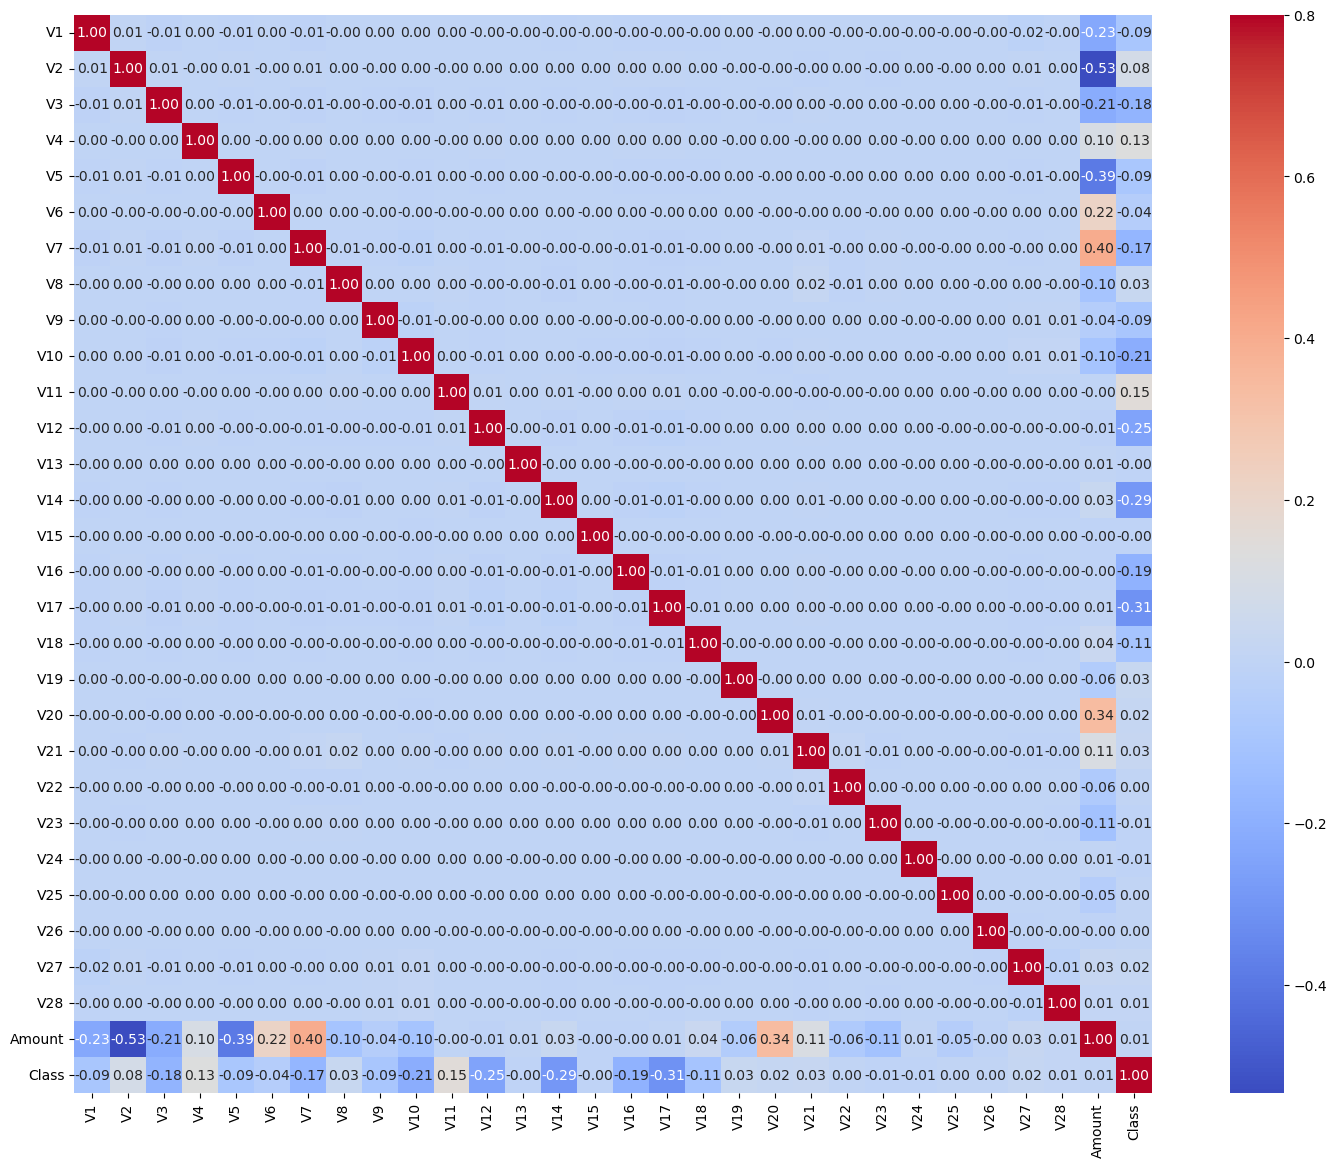

In [376]:
corrmat = data.corr()
fig = plt.figure(figsize = (20, 14))
sns.heatmap(corrmat, vmax = .8, square = True,annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other.This gives us a deeper understanding of the Data available to us.

#Separating the X and the Y values

In [374]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(283726, 29)
(283726,)


#Training and Testing Data Bifurcation

In [349]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)


# Building a Random Forest Model using scikit learn

In [351]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)

# Building all kinds of evaluating parameters

In [353]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

The model used is Random Forest classifier
The accuracy is 0.9995241955380115
The precision is 0.9846153846153847
The recall is 0.7111111111111111
The F1-Score is 0.8258064516129032


Here we can see that This model has excellent accuracy and high precision but slightly lower recall.that means this model is not able to predict the minority class acurately.

In [355]:
y_rf_predict_pro=rfc.predict_proba(xTest)[:,1]
fpr, tpr, thresholds = roc_curve(yTest, y_rf_predict_pro)
roc_auc=roc_auc_score(yTest,y_rf_predict_pro)
print(f"ROC AUC Score: {roc_auc}")

ROC AUC Score: 0.9312550009413537


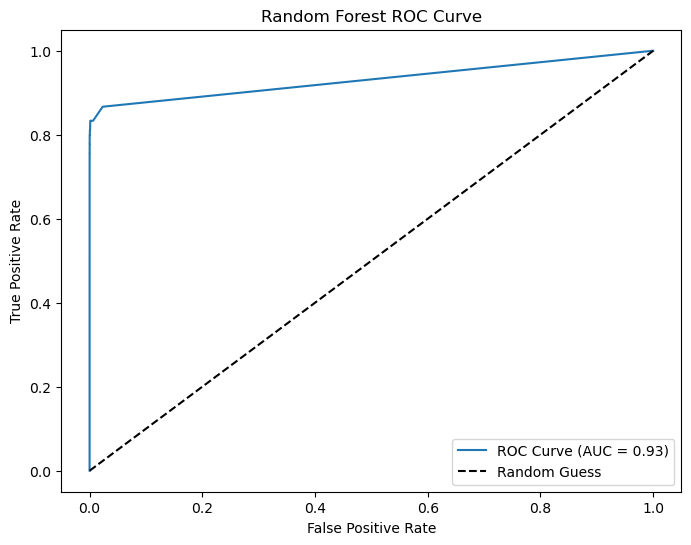

In [357]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [359]:
features = X.columns
importances_rf = rfc.feature_importances_
indices = np.argsort(importances_rf)

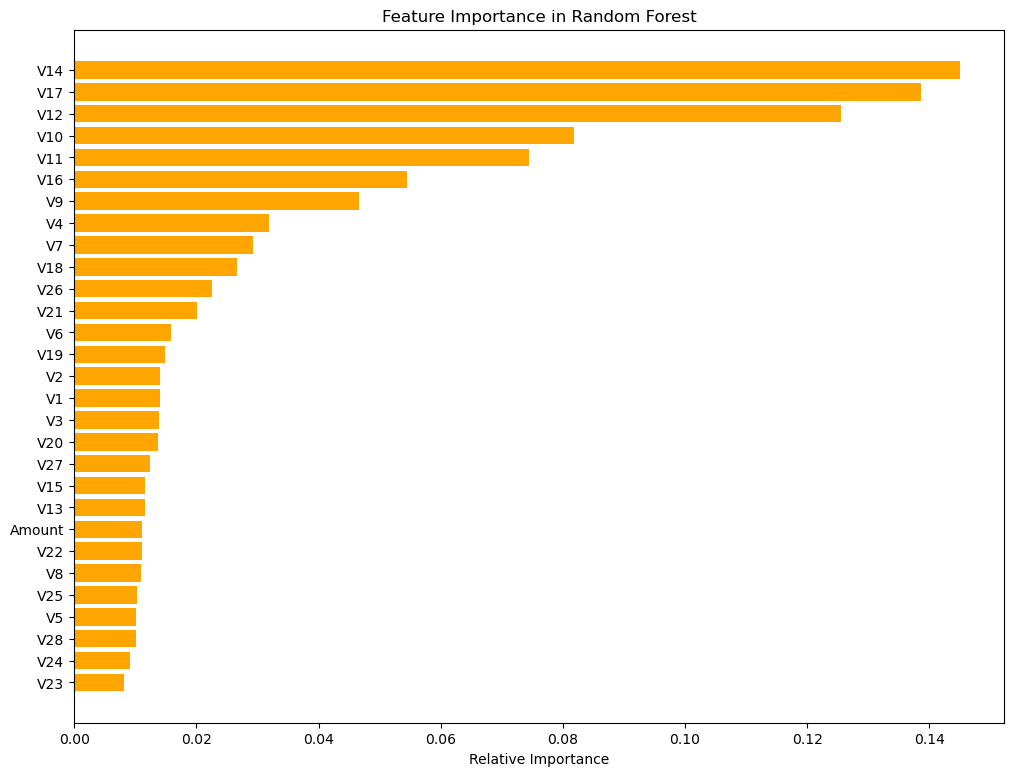

In [361]:
plt.figure(figsize=(12,9))
plt.title('Feature Importance in Random Forest')
plt.barh(range(len(indices)), importances_rf[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#Visualizing the Confusion Matrix

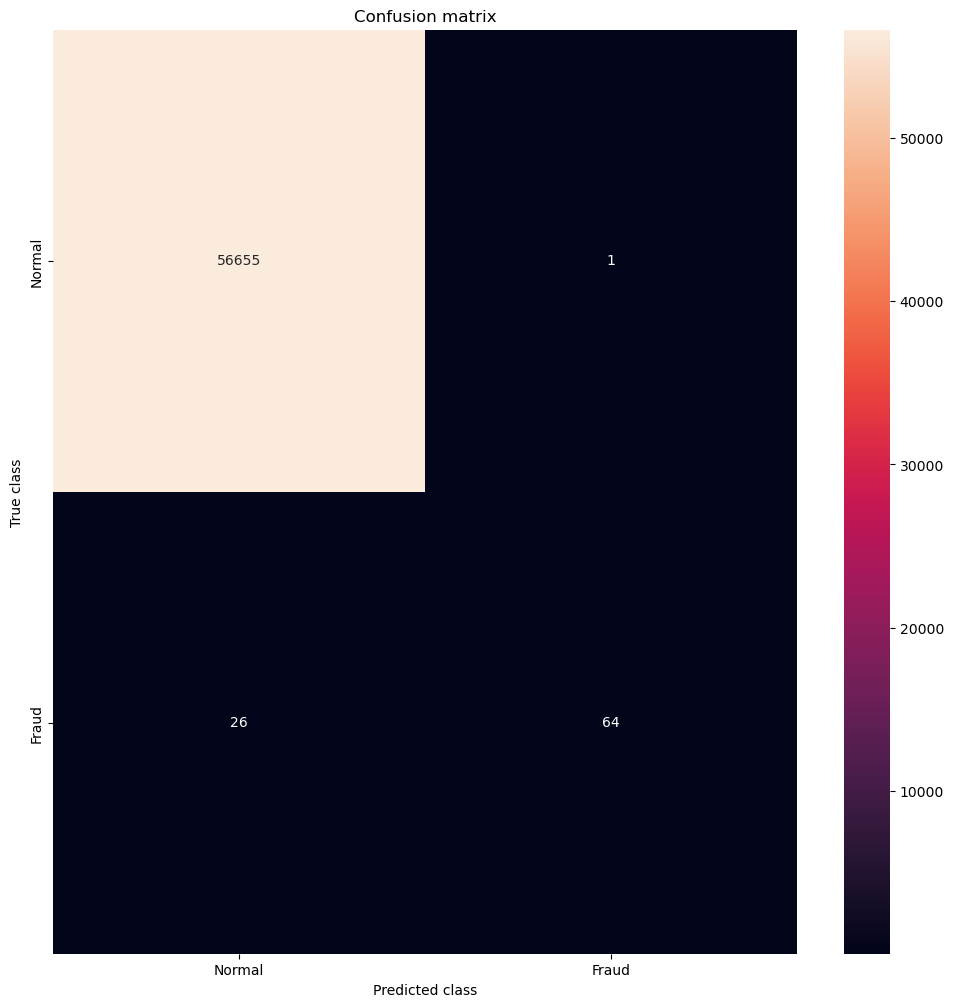

In [363]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Logistics Regression

In [379]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(xTrain, yTrain)

LogisticRegression(max_iter=10000)

In [381]:
y_train_pred = clf.predict(xTrain)
y_test_pred= clf.predict(xTest)

In [383]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(yTrain, y_train_pred)
cm

array([[226562,     35],
       [   148,    235]], dtype=int64)

In [385]:
confusion_matrix(yTest, y_test_pred)

array([[56650,     6],
       [   42,    48]], dtype=int64)

In [387]:
print(classification_report(yTest,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.89      0.53      0.67        90

    accuracy                           1.00     56746
   macro avg       0.94      0.77      0.83     56746
weighted avg       1.00      1.00      1.00     56746



Here we can see that the recall score is very less that means this model is not able to predict the minority class acurately. he need to handle the imbalance data to get right recall and pricision score.

In [389]:
from sklearn.metrics import roc_auc_score, roc_curve
y_lr_predict_pro = clf.predict_proba(xTest)[:, 1]
fpr, tpr, thresholds = roc_curve(yTest, y_lr_predict_pro)
auc_score = roc_auc_score(yTest, y_lr_predict_pro)
print(f"ROC AUC Score: {auc_score}")

ROC AUC Score: 0.9675305547710942


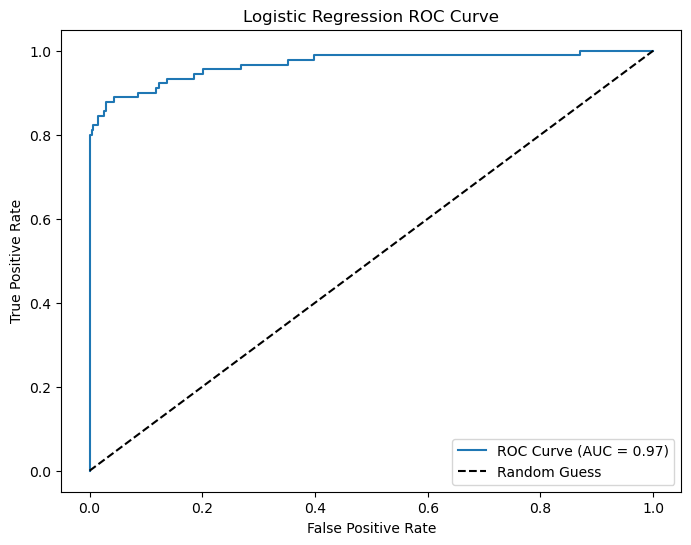

In [391]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Handling imbalanced data using SMOTE technique 

In [393]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(X, Y)

In [395]:
y_sm=pd.DataFrame(y_sm)
y_sm.value_counts()

Class
0        283253
1        283253
Name: count, dtype: int64

In [397]:
x_train, x_test, y_train, y_test = train_test_split( x_sm,y_sm , test_size = 0.2, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(453204, 29)
(113302, 29)


In [399]:
clff = LogisticRegression(fit_intercept=True, max_iter=10000)
clff.fit(x_train, y_train)

C:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000)

In [401]:
train_class_preds = clff.predict(x_train)
test_class_preds = clff.predict(x_test)
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.958347675660409
The accuracy on test data is  0.9585179431960601


In [403]:
cm = confusion_matrix(y_train, train_class_preds)
print('Confusion Matrix for training Data')
print(cm)
print('-'*50)
cm = confusion_matrix(y_test, test_class_preds)
print('Confusion Matrix for Test Data')
print(cm)

Confusion Matrix for training Data
[[222633   4159]
 [ 14718 211694]]
--------------------------------------------------
Confusion Matrix for Test Data
[[55465   996]
 [ 3704 53137]]


In [405]:
print(classification_report(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     56461
           1       0.98      0.93      0.96     56841

    accuracy                           0.96    113302
   macro avg       0.96      0.96      0.96    113302
weighted avg       0.96      0.96      0.96    113302



In [407]:
y_lr_predict_pro=clf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_lr_predict_pro)
roc_score=roc_auc_score(y_test,y_lr_predict_pro)
print(f"ROC AUC Score: {roc_score}")

ROC AUC Score: 0.9851884303652948


C:\Users\SUSHANT\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


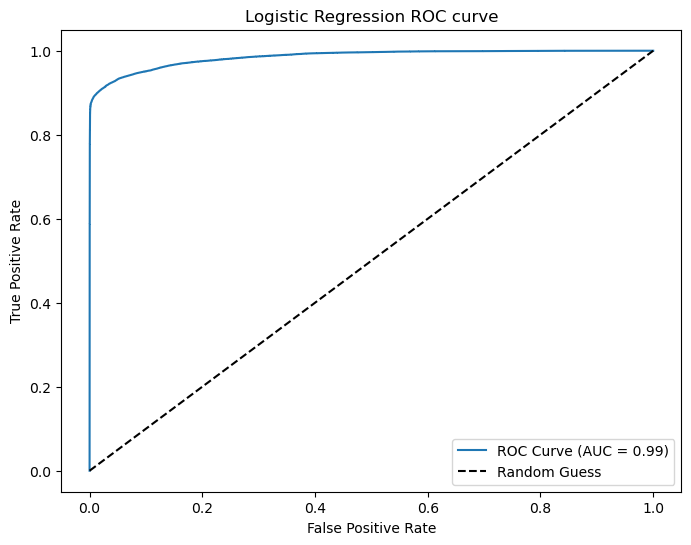

In [409]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc='lower right')
plt.show()

### *Conclusion -*

After evaluating multiple models and their performance metrics, it is evident that the **Logistic Regression model with the SMOTE** algorithm provides the best predictive performance. This model effectively handles class imbalance and achieves a superior balance across all key metrics:

* Recall (0.93): Ensures most positive cases are correctly identified, which is critical for imbalanced datasets.
* Precision (0.98): Reduces false positives, making predictions more reliable.
* F1-Score (0.96): Indicates strong overall performance by balancing precision and recall.
* ROC-AUC (0.985): Demonstrates excellent ability to distinguish between classes